In [1]:
from striprtf.striprtf import rtf_to_text 
 
with open('algoparams_from_ui.json.rtf', 'r') as file: 
    json_text = file.read() 
 
original_text = rtf_to_text(json_text) 
 
print(original_text) 

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {

      "session_info" : {
        "project_id": "1",
        "experiment_id": "kkkk-11",
        "dataset":"iris_modified.csv",
        "session_name": "test",
        "session_description": "test"
        },

      "target": {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type":"regression",
        "partitioning": true
      },
      "train": {
        "policy": "Split the dataset",
        "time_variable": "sepal_length",
        "sampling_method": "No sampling(whole data)",
        "split": "Randomly",
        "k_fold": false,
        "train_ratio": 0,
        "random_seed": 0
      },
      "metrics": {
        "optomize_model_hyperparameters_for": "AUC",
        "optimize_threshold_for": "F1 Score",
        "compute_lift_at": 0,
        "cost_matrix_gain_for_true_prediction_true_result": 1,
        "cost_matrix_gain_for_true_prediction_false_result": 0,

Mean Squared Error: 0.20575989058144606
R^2 Score: 0.5974263010363012


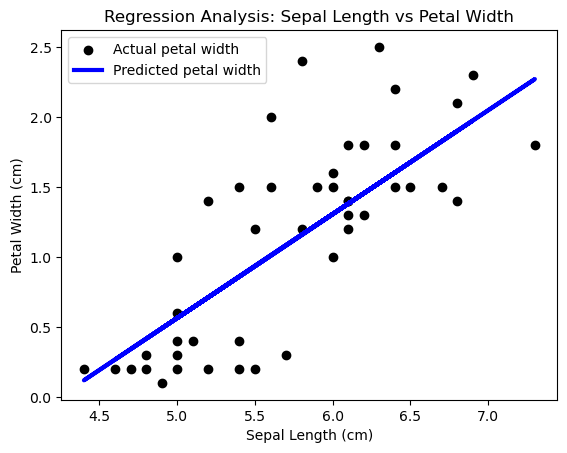

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('iris.csv')

# Assuming the dataset has the following columns: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
# We will focus on 'sepal_length' for our features and 'petal_width' for our target variable

# Select features and target
X = df[['sepal_length']]  # Using only sepal length as feature
y = df['petal_width']     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # 70% training, 30% testing

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results for visualization
plt.scatter(X_test, y_test, color='black', label='Actual petal width')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted petal width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Regression Analysis: Sepal Length vs Petal Width')
plt.legend()
plt.show()


In [46]:
import pandas as pd
import hashlib

# Load iris.csv data into a DataFrame
iris_df = pd.read_csv("iris.csv")

# Define the feature handling dictionary
feature_handling = {
    "sepal_length": {
        "feature_name": "sepal_length",
        "is_selected": True,
        "feature_variable_type": "numerical",
        "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": False,
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": 0
        }
    },
    "sepal_width": {
        "feature_name": "sepal_width",
        "is_selected": True,
        "feature_variable_type": "numerical",
        "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": False,
            "missing_values": "Impute",
            "impute_with": "custom",
            "impute_value": -1
        }
    },
    "petal_length": {
        "feature_name": "petal_length",
        "is_selected": True,
        "feature_variable_type": "numerical",
        "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": False,
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": 0
        }
    },
    "petal_width": {
        "feature_name": "petal_width",
        "is_selected": True,
        "feature_variable_type": "numerical",
        "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": False,
            "missing_values": "Impute",
            "impute_with": "custom",
            "impute_value": -2
        }
    },
    "species": {
        "feature_name": "species",
        "is_selected": True,
        "feature_variable_type": "text",
        "feature_details": {
            "text_handling": "Tokenize and hash",
            "hash_columns": 0
        }
    }
}

# Function to handle missing values based on feature details
def handle_missing_values(feature_name, value):
    if feature_name in feature_handling:
        details = feature_handling[feature_name]["feature_details"]
        if details["missing_values"] == "Impute":
            if details["impute_with"] == "Average of values":
                return iris_df[feature_name].mean()
            elif details["impute_with"] == "custom":
                return details["impute_value"]
    return value  # If missing values handling is not specified, return original value

# Function to tokenize and hash text
def tokenize_and_hash(text):
    tokens = text.split()  # Tokenize by whitespace
    hashed_tokens = [hashlib.sha256(token.encode()).hexdigest() for token in tokens]  # Hash each token
    return hashed_tokens

# Apply missing value handling to each feature in iris_df
for feature_name in feature_handling:
    if feature_handling[feature_name]["feature_variable_type"] == "numerical":
        iris_df[feature_name] = iris_df[feature_name].apply(lambda x: handle_missing_values(feature_name, x))
    elif feature_handling[feature_name]["feature_variable_type"] == "text":
        iris_df[feature_name] = iris_df[feature_name].apply(tokenize_and_hash)

# Display the updated DataFrame with imputed missing values and hashed text
print(iris_df)
iris_df.to_csv(r' C:\Users\HP\Downloads\DS_Assignment - internship\Screening Test - DS\file3.csv')

     sepal_length  sepal_width  petal_length  petal_width  \
0        5.843333           -1      3.758667           -2   
1        5.843333           -1      3.758667           -2   
2        5.843333           -1      3.758667           -2   
3        5.843333           -1      3.758667           -2   
4        5.843333           -1      3.758667           -2   
..            ...          ...           ...          ...   
145      5.843333           -1      3.758667           -2   
146      5.843333           -1      3.758667           -2   
147      5.843333           -1      3.758667           -2   
148      5.843333           -1      3.758667           -2   
149      5.843333           -1      3.758667           -2   

                                               species  
0    [232df5210712987992fd1445b9c338f2ad60fa3235795...  
1    [232df5210712987992fd1445b9c338f2ad60fa3235795...  
2    [232df5210712987992fd1445b9c338f2ad60fa3235795...  
3    [232df5210712987992fd1445b9c338f2a

OSError: Cannot save file into a non-existent directory: ' C:\Users\HP\Downloads\DS_Assignment - internship\Screening Test - DS'

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df =  pd.read_csv('file3.csv')

# Configuration
config = {
    "target": {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type": "regression",
        "partitioning": True
    },
    "train": {
        "policy": "Split the dataset",
        "time_variable": "sepal_length",
        "sampling_method": "No sampling(whole data)",
        "split": "Randomly",
        "k_fold": False,
        "train_ratio": 0,
        "random_seed": 0
    },
    "feature_handling": {
        "sepal_length": {"impute_with": "mean", "feature_variable_type": "numerical"},
        "sepal_width": {"impute_with": "constant", "impute_value": -1, "feature_variable_type": "numerical"},
        "petal_length": {"impute_with": "mean", "feature_variable_type": "numerical"},
        "petal_width": {"impute_with": "constant", "impute_value": -2, "feature_variable_type": "numerical"},
        "species": {"feature_variable_type": "categorical"}
    }
}

# Extract target variable
target_column = config["target"]["target"]

# Prepare features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Separate numerical and categorical features
numerical_features = [feat for feat, details in config["feature_handling"].items()
                      if feat != target_column and details["feature_variable_type"] == "numerical"]
categorical_features = [feat for feat, details in config["feature_handling"].items()
                        if feat != target_column and details["feature_variable_type"] == "categorical"]

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=config["train"]["random_seed"])

# Fit model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.0


In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

iris_df = pd.read_csv("file3.csv")

# Define the features and target variable
X = iris_df.drop(columns=["species"])  # Features
y = iris_df["species"]  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scale features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define function to train neural network
def train_neural_network(params):
    model = MLPClassifier(hidden_layer_sizes=params['hidden_layer_sizes'],
                          activation=params['activation'],
                          alpha=params['alpha_value'],
                          max_iter=params['max_iterations'],
                          tol=params['convergence_tolerance'],
                          early_stopping=params['early_stopping'],
                          solver=params['solver'],
                          shuffle=params['shuffle_data'],
                          learning_rate_init=params['initial_learning_rate'],
                          batch_size='auto' if params['automatic_batching'] else 'batch',
                          beta_1=params['beta_1'],
                          beta_2=params['beta_2'],
                          epsilon=params['epsilon'],
                          power_t=params['power_t'],
                          momentum=params['momentum'],
                          nesterovs_momentum=params['use_nesterov_momentum'],
                          random_state=42)
    model.fit(X_train_scaled, y_train)
    return model

# Example usage with provided parameters
params_neural_network = {
    "model_name": "Neural Network",
    "is_selected": False,
    "hidden_layer_sizes": [67, 89],
    "activation": "relu",
    "alpha_value": 0.0001,
    "max_iterations": 200,
    "convergence_tolerance": 0.0001,
    "early_stopping": True,
    "solver": "adam",
    "shuffle_data": True,
    "initial_learning_rate": 0.001,
    "automatic_batching": True,
    "beta_1": 0.9,
    "beta_2": 0.999,
    "epsilon": 1e-08,
    "power_t": 0.5,
    "momentum": 0.9,
    "use_nesterov_momentum": False
}

neural_network_model = train_neural_network(params_neural_network)

# Evaluate the model
y_pred = neural_network_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [53]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score

# Load Iris dataset
iris_df = pd.read_csv("file3.csv")
iris_data = load_iris()
# Define the features and target variable
X = iris_df.drop(columns=["species"])  # Features
#print(X)
y = iris_data.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grid_linear_regression = {
    'fit_intercept': [True, False]
}

param_grid_logistic_regression = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}

param_grid_ridge_regression = {
    'alpha': [0.1, 0.5, 1.0]
}

param_grid_lasso_regression = {
    'alpha': [0.1, 0.5, 1.0]
}

# Initialize and perform grid search for Linear Regression
linear_regression = LinearRegression()
grid_search_linear_regression = GridSearchCV(estimator=linear_regression, param_grid=param_grid_linear_regression, cv=5)
grid_search_linear_regression.fit(X_train, y_train)

# Initialize and perform grid search for Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
grid_search_logistic_regression = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_logistic_regression, cv=5)
grid_search_logistic_regression.fit(X_train, y_train)

# Initialize and perform grid search for Ridge Regression
ridge_regression = Ridge()
grid_search_ridge_regression = GridSearchCV(estimator=ridge_regression, param_grid=param_grid_ridge_regression, cv=5)
grid_search_ridge_regression.fit(X_train, y_train)

# Initialize and perform grid search for Lasso Regression
lasso_regression = Lasso()
grid_search_lasso_regression = GridSearchCV(estimator=lasso_regression, param_grid=param_grid_lasso_regression, cv=5)
grid_search_lasso_regression.fit(X_train, y_train)

# Predict on the test set and evaluate each model
y_pred_linear_regression = grid_search_linear_regression.predict(X_test)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

y_pred_logistic_regression = grid_search_logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

y_pred_ridge_regression = grid_search_ridge_regression.predict(X_test)
mse_ridge_regression = mean_squared_error(y_test, y_pred_ridge_regression)

y_pred_lasso_regression = grid_search_lasso_regression.predict(X_test)
mse_lasso_regression = mean_squared_error(y_test, y_pred_lasso_regression)

print("Linear Regression Mean Squared Error:", mse_linear_regression)
print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("Ridge Regression Mean Squared Error:", mse_ridge_regression)
print("Lasso Regression Mean Squared Error:", mse_lasso_regression)


Linear Regression Mean Squared Error: 0.05241410899087876
Logistic Regression Accuracy: 1.0
Ridge Regression Mean Squared Error: 0.05241434976334007
Lasso Regression Mean Squared Error: 0.05258362272921477


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [40]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score

# Load Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.